<a href="https://colab.research.google.com/github/AdrienAlvarez/AdrienAlvarez/blob/main/Analysez_les_ventes_d'une_librairie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Projet 6 : Analysez les ventes d'une librairie**

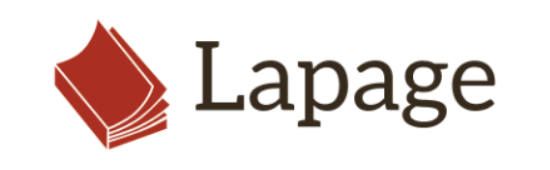

**Import des librairies Python**

In [425]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Import des fonctions**

In [426]:
def testerCle(df, colonnes):
    """Fonction qui prend en arguments un dataframe et les colonnes qui composent la clé primaire à tester."""

    # On compare la taille du dataframe avant et après dédoublonnage.
    if df.size == df.drop_duplicates(colonnes).size :
        print("La clé n'est pas présente plusieurs fois dans le dataframe.")
        print("Elle peut donc être utilisée comme clé primaire.".format(colonnes))
    else :
        print("La clé est présente plusieurs fois dans le dataframe.")
        print("Elle ne peut donc pas être utilisée comme clé primaire.".format(colonnes))
    
    # On renvoie également le comptage.
    print("Le dataframe est de la forme : " + str(df.shape) + " (lignes, colonnes)")

**Import des DataFrames**

In [427]:
clients = pd.read_csv('/content/customers.csv', sep=',')
produits = pd.read_csv('/content/products.csv', sep=',')
transactions = pd.read_csv('/content/transactions.csv', sep=',')

###**Les dataframes**

In [428]:
clients.head(2)

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975


In [429]:
produits.head(2)

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0


In [430]:
transactions.head(2)

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534


###**Les infos des dataframes**

In [431]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [432]:
produits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [433]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


#**-----------------------------------------------**

#**NETTOYAGE DES DONNEES**

#**-----------------------------------------------**

#**Clients**

In [434]:
clients.head(2)

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975


In [435]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


##**Valeurs manquantes**

In [436]:
# On regarde combien il y a de valeurs manquantes dans chaque colonnes.
print(clients.isnull().sum())

client_id    0
sex          0
birth        0
dtype: int64


Il n y a aucune valeur manquante.

##**Érreur lexicale**

In [437]:
# On regarde toutes les réponses qu'il y a dans la colonne 'sex'.
clients['sex'].value_counts()

f    4491
m    4132
Name: sex, dtype: int64

Il n y a pas d'erreur lexicale dans la colonne 'sex'.

In [438]:
# On regarde toutes les réponses qu'il y a dans la colonne 'birth'.
clients['birth'].value_counts()

2004    440
1979    215
1988    207
1986    203
1978    199
       ... 
1933      8
1932      6
1931      4
1930      4
1929      3
Name: birth, Length: 76, dtype: int64

Il n y a pas d'erreur lexicale dans la colonne 'birth', car les années de naissance vont bien de 1929 à 2004.



##**Érreur d'irrégularité**

Il n y a pas d'unité donc il n y a pas d'erreur d'irrégularité.

##**Érreur de format**

Il n y a pas de date, ni d'heure.. Il n y a donc pas d'érreur de format.

##**Doublon**

In [439]:
# On test la colonne 'client_id' pour savoir si c'est bien une clé primaire.
testerCle(clients,['client_id'])

La clé n'est pas présente plusieurs fois dans le dataframe.
Elle peut donc être utilisée comme clé primaire.
Le dataframe est de la forme : (8623, 3) (lignes, colonnes)


##**Outlier**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


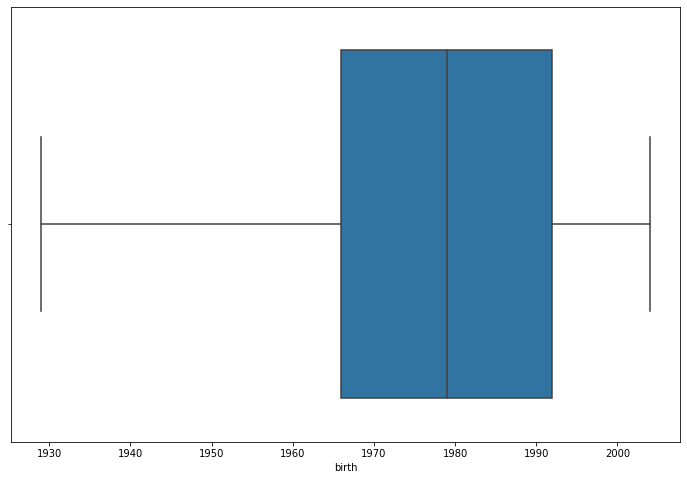

In [440]:
# Nous allons vérifier les outliers de la colonne 'birth'.
sns.boxplot(clients['birth'])

In [441]:
q1_clients=clients["birth"].quantile(q=0.25)

In [442]:
q3_clients=clients["birth"].quantile(q=0.75)

In [443]:
IQR_clients=q3_clients-q1_clients

In [444]:
borne_inf_clients = q1_clients-1.5*IQR_clients

In [445]:
borne_inf_clients

1927.0

In [446]:
borne_sup_clients = q3_clients +1.5*IQR_clients

In [447]:
borne_sup_clients

2031.0

In [448]:
outliers_clients = clients[clients["birth"]>borne_sup_clients] 

In [449]:
outliers_clients = clients[clients["birth"]<borne_inf_clients] 

In [450]:
outliers_clients

,client_id,sex,birth


Il n y a donc pas d'outlier dans les années de naissances.

#**Produits**

In [451]:
produits.head(2)

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0


In [452]:
produits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


##**Valeurs manquantes**

In [453]:
# On regarde combien il y a de valeurs manquantes dans chaque colonnes.
print(produits.isnull().sum())

id_prod    0
price      0
categ      0
dtype: int64


Il y a aucune valeur manquante dans le dataframe 'products'.

##**Érreur lexicale**

Il n y a aucune erreur lexicale car les colonnes n'ont pas de texte mise à part l'id'.

##**Érreur d'irrégularité**

Il n y a aucune erreur d'irrégularité car les colonnes n'ont pas d'unités précises.

##**Érreur de format**

Il n y a aucune erreur de format car il n y a pas d'heure ni de date.

##**Doublon**

In [454]:
# On test la colonne 'id_prod' pour savoir si c'est bien une clé primaire.
testerCle(produits,['id_prod'])

La clé n'est pas présente plusieurs fois dans le dataframe.
Elle peut donc être utilisée comme clé primaire.
Le dataframe est de la forme : (3287, 3) (lignes, colonnes)


##**Outlier**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


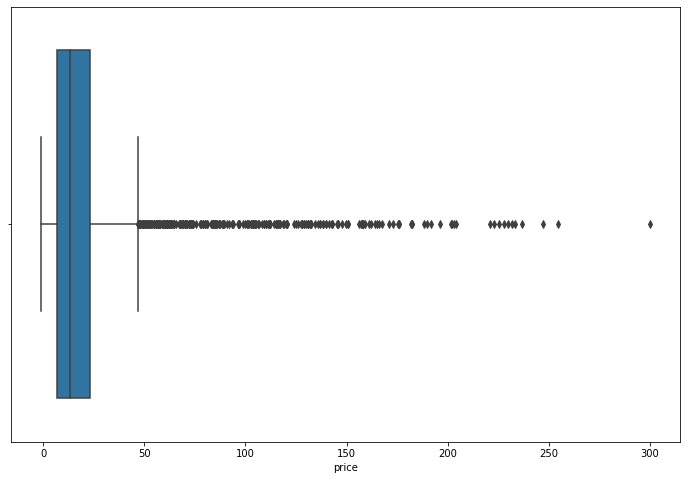

In [455]:
# Nous allons vérifier les outliers de la colonne 'price'.
sns.boxplot(produits['price'])

In [456]:
q1_produits=produits["price"].quantile(q=0.25)

In [457]:
q3_produits=produits["price"].quantile(q=0.75)

In [458]:
IQR_produits=q3_produits-q1_produits

In [459]:
borne_inf_produits = q1_produits-1.5*IQR_produits

In [460]:
borne_inf_produits

-17.009999999999998

In [461]:
borne_sup_produits = q3_produits +1.5*IQR_produits

In [462]:
borne_sup_produits

46.989999999999995

In [463]:
outliers_produits = produits[produits["price"]>borne_sup_produits] 

In [464]:
outliers_produits = produits[produits["price"]<borne_inf_produits] 

In [465]:
outliers_produits

,id_prod,price,categ


Il n y a aucun outlier dans la colonne 'prix'.

#**Transaction**

In [466]:
transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [467]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


##**Valeurs manquantes**

In [468]:
# On regarde combien il y a de valeurs manquantes dans chaque colonnes.
print(transactions.isnull().sum())

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64


Il n y a aucune valeur manquante dans le dataframe 'transactions'.

##**Érreur lexicale**

Il n y a pas d'erreur lexicale, vue qu'il n y a aucun texte.

##**Érreur d'irrégularité**

Il n y a pas d'erreur d'irrégularité, car il n y a aucune unité.

##**Érreur de format**

Nous pouvons voir qu'il y a une erreur de format dans les dates.

In [469]:
# Je convertis donc toute la colonne en date time.
transactions['date'] = pd.to_datetime(transactions['date'], errors='coerce')

In [470]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679532 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679532 non-null  object        
 3   client_id   679532 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 20.7+ MB


In [471]:
transactions.head(2)

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534


In [472]:
# Puis je lui impose un format à respecter.
transactions['date'] = transactions["date"].dt.strftime("%Y-%m-%d %H:%M:%S")

In [473]:
transactions['date'] = pd.to_datetime(transactions['date'], errors='coerce')

In [474]:
transactions

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29,s_211425,c_103
1,1_251,2022-02-02 07:55:19,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33,s_225667,c_6714
3,2_209,2021-06-24 04:19:29,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35,s_63204,c_2227


Voila, désormais il n y a plus d'erreur de format dans le dataframe 'transactions' !

##**Doublon**

In [475]:
# On test la colonne 'id_prod' pour savoir si c'est bien une clé primaire.
testerCle(transactions,['id_prod'])

La clé est présente plusieurs fois dans le dataframe.
Elle ne peut donc pas être utilisée comme clé primaire.
Le dataframe est de la forme : (679532, 4) (lignes, colonnes)


In [476]:
# On test la colonne 'session_id' pour savoir si c'est bien une clé primaire.
testerCle(transactions,['session_id'])

La clé est présente plusieurs fois dans le dataframe.
Elle ne peut donc pas être utilisée comme clé primaire.
Le dataframe est de la forme : (679532, 4) (lignes, colonnes)


In [477]:
# On test la colonne 'client_id' pour savoir si c'est bien une clé primaire.
testerCle(transactions,['client_id'])

La clé est présente plusieurs fois dans le dataframe.
Elle ne peut donc pas être utilisée comme clé primaire.
Le dataframe est de la forme : (679532, 4) (lignes, colonnes)


Aucune colonne ne peux être une clé primaire pour le dataframe 'transactions'.

##**Outlier**

Nous ne trouvons aucun outlier dans le dataframe 'transactions' car celui-ci est composé 'd'id' et de 'date'.

#**Jointure des trois dataframes**

Je regroupe donc les 3 dataframes grâce aux clés primaires :
- Clients | Primary Key = (client_id)
- Produits | Primary Key = (id_prod)

- Transactions | Elle a les colonnes "client_id" et "id_prod", c'est donc parfait pour la jointure.

In [478]:
clients_transac = pd.merge(clients, transactions, on = ['client_id'])

In [479]:
clients_transac.head(2)

,client_id,sex,birth,id_prod,date,session_id
0,c_4410,f,1967,0_1316,2021-12-29 09:11:18,s_141762
1,c_4410,f,1967,1_385,2021-03-22 01:40:22,s_9707


In [480]:
df = pd.merge(clients_transac, produits, on = ['id_prod'])

#**-----------------------------------------------**

#**DATAFRAME COMPLET ET NETTOYÉ ✔**

In [481]:
df

,client_id,sex,birth,id_prod,date,session_id,price,categ
0,c_4410,f,1967,0_1316,2021-12-29 09:11:18,s_141762,7.20,0
1,c_4410,f,1967,0_1316,2022-03-29 09:11:18,s_186233,7.20,0
2,c_4410,f,1967,0_1316,2022-05-29 09:11:18,s_215758,7.20,0
3,c_3654,f,1978,0_1316,2021-11-26 03:51:34,s_125143,7.20,0
4,c_3654,f,1978,0_1316,2022-08-26 03:51:34,s_258546,7.20,0
...,...,...,...,...,...,...,...,...
679306,c_8138,f,1984,0_394,2021-11-09 09:02:38,s_116986,2.14,0
679307,c_8138,f,1984,0_394,2022-08-09 09:02:38,s_250653,2.14,0
679308,c_8138,f,1984,0_394,2022-03-09 09:02:38,s_176587,2.14,0
679309,c_8327,m,1972,0_394,2022-06-28 22:44:11,s_230707,2.14,0


#**-----------------------------------------------**

#**Demande d'Antoine : Les indicateurs de ventes**

##**Indicateur sur le chiffre d'affaire ✔**

In [482]:
# Je regroupe les prix et j'en fais la somme par année.
indicateur_ca = df.groupby(df['date'].dt.strftime('%Y'))['price'].sum().sort_values()

In [483]:
indicateur_ca

date
2023     974220.31
2021    4770826.56
2022    6108681.81
Name: price, dtype: float64

In [484]:
# J'execute une formule pour obtenir l'évolution du ca entre 2021 et 2022.
((indicateur_ca['2022'] - indicateur_ca['2021']) / indicateur_ca['2021'])*100

28.042420598916095

###**Résultat**

Notre chiffre d'affaire à augmenter de +128% depuis l'année 2021, super chiffre !

##**Graphique sur l'évolution du chiffre d'affaire ✔**



In [485]:
# Je regroupe les prix et j'en fais la somme par mois de l'année.
evolution_ca = df.groupby(df['date'].dt.strftime('%B' ' ' '%Y'))['price'].sum().sort_values()

In [486]:
evolution_ca.head(5)

date
October 2021     320798.74
February 2023    456679.76
April 2021       476109.30
August 2021      482284.79
March 2021       482440.61
Name: price, dtype: float64

In [487]:
# Je crée le dataframe de ce résultat.
evolution_ca = pd.DataFrame(data=evolution_ca,columns=['price'])

In [488]:
evolution_ca.head(2)

,price
date,
October 2021,320798.74
February 2023,456679.76


In [489]:
# Je sort la colonne date de l'index.
evolution_ca = evolution_ca.reset_index()

In [490]:
# Nous pouvons voir que cette colonne date est de type object.
evolution_ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    24 non-null     object 
 1   price   24 non-null     float64
dtypes: float64(1), object(1)
memory usage: 512.0+ bytes


In [491]:
# Je transorme la colonne date en datetime.
evolution_ca['date'] = evolution_ca['date'].astype('datetime64[ns]')

In [492]:
evolution_ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    24 non-null     datetime64[ns]
 1   price   24 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 512.0 bytes


In [493]:
# Je trie les dates par ordre croissant.
evolution_ca = evolution_ca.sort_values(by=['date'])

###**Graphique**

Text(0, 0.5, "Chiffre d'affaire (en €)")

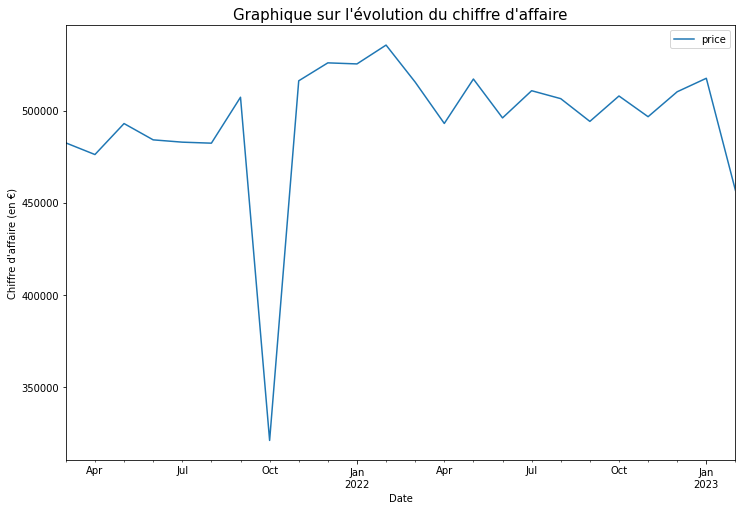

In [494]:
# Il ne me reste plus qu'à faire apparaitre le graphique.
evolution_ca.plot(x="date", y="price", kind='line',figsize = ( 12, 8)) 
plt.title('Graphique sur l\'évolution du chiffre d\'affaire', fontsize=15)

plt.xlabel('Date') 
plt.ylabel('Chiffre d\'affaire (en €)') 

Nous pouvons analyser une baisse des ventes lors du mois d'octobre.
Pas d'inquiétude, c'est seulement un problème de données manquantes.

##**Sans le mois d'octobre ✔**

In [495]:
# Je regroupe les prix et j'en fais la somme par mois de l'année.
octobre = df.groupby(df['date'].dt.strftime('%B' ' ' '%Y'))['price'].sum().sort_values()

In [496]:
octobre

date
October 2021      320798.74
February 2023     456679.76
April 2021        476109.30
August 2021       482284.79
March 2021        482440.61
July 2021         482835.40
June 2021         484088.56
May 2021          492943.47
April 2022        492998.94
September 2022    494114.53
June 2022         496016.12
November 2022     496664.94
August 2022       506467.27
September 2021    507240.68
October 2022      507917.77
December 2022     510219.50
July 2022         510783.12
March 2022        515456.53
November 2021     516167.73
May 2022          517132.60
January 2023      517540.55
January 2022      525338.99
December 2021     525917.28
February 2022     535571.50
Name: price, dtype: float64

In [497]:
# Je crée le dataframe de ce résultat.
octobre = pd.DataFrame(data=octobre,columns=['price'])

In [498]:
octobre

,price
date,
October 2021,320798.74
February 2023,456679.76
April 2021,476109.30
August 2021,482284.79
March 2021,482440.61
July 2021,482835.40
June 2021,484088.56
May 2021,492943.47
April 2022,492998.94


In [499]:
octobre.loc['October 2021'] = 512000.00

In [500]:
octobre

,price
date,
October 2021,512000.00
February 2023,456679.76
April 2021,476109.30
August 2021,482284.79
March 2021,482440.61
July 2021,482835.40
June 2021,484088.56
May 2021,492943.47
April 2022,492998.94


In [501]:
# Je sort la colonne date de l'index.
octobre = octobre.reset_index()

In [502]:
# Nous pouvons voir que cette colonne date est de type object.
octobre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    24 non-null     object 
 1   price   24 non-null     float64
dtypes: float64(1), object(1)
memory usage: 512.0+ bytes


In [503]:
# Je transorme la colonne date en datetime.
octobre['date'] = octobre['date'].astype('datetime64[ns]')

In [504]:
# Je trie les dates par ordre croissant.
octobre = octobre.sort_values(by=['date'])

###**Graphique**

Text(0, 0.5, "Chiffre d'affaire (en €)")

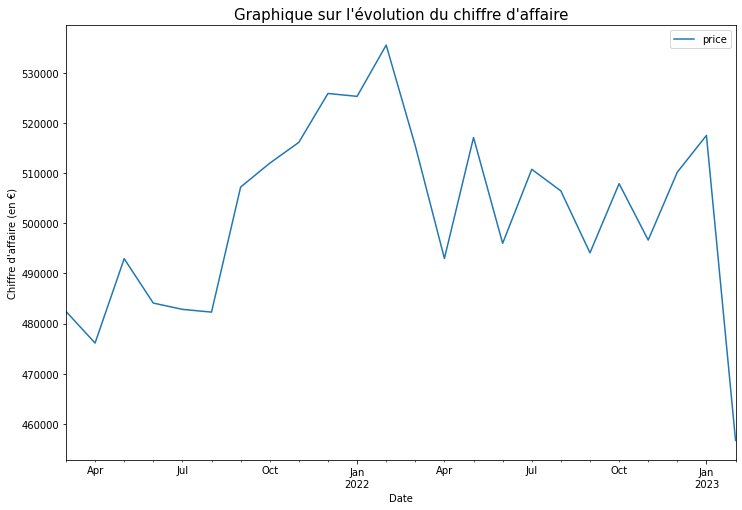

In [505]:
# Il ne me reste plus qu'à faire apparaitre le graphique.
octobre.plot(x="date", y="price", kind='line',figsize = ( 12, 8)) 
plt.title('Graphique sur l\'évolution du chiffre d\'affaire', fontsize=15)

plt.xlabel('Date') 
plt.ylabel('Chiffre d\'affaire (en €)') 

##**Mettre en place une décomposition en moyenne mobile ✔**

In [506]:
# Nous prendrons à chaque fois la moyenne de chiffre d'affaire sur 4 mois.
octobre['MM_5mois'] = octobre.price.rolling(5).mean() 
  
print(octobre.head(30)) 

         date      price    MM_5mois
4  2021-03-01  482440.61         NaN
2  2021-04-01  476109.30         NaN
7  2021-05-01  492943.47         NaN
6  2021-06-01  484088.56         NaN
5  2021-07-01  482835.40  483683.468
3  2021-08-01  482284.79  483652.304
13 2021-09-01  507240.68  489878.580
0  2021-10-01  512000.00  493689.886
18 2021-11-01  516167.73  500105.720
22 2021-12-01  525917.28  508722.096
21 2022-01-01  525338.99  517332.936
23 2022-02-01  535571.50  522999.100
17 2022-03-01  515456.53  523690.406
8  2022-04-01  492998.94  519056.648
19 2022-05-01  517132.60  517299.712
10 2022-06-01  496016.12  511435.138
16 2022-07-01  510783.12  506477.462
12 2022-08-01  506467.27  504679.610
9  2022-09-01  494114.53  504902.728
14 2022-10-01  507917.77  503059.762
11 2022-11-01  496664.94  503189.526
15 2022-12-01  510219.50  503076.802
20 2023-01-01  517540.55  505291.458
1  2023-02-01  456679.76  497804.504


###**Graphique**

Text(0.5, 1.0, 'La décomposition en moyenne mobile')

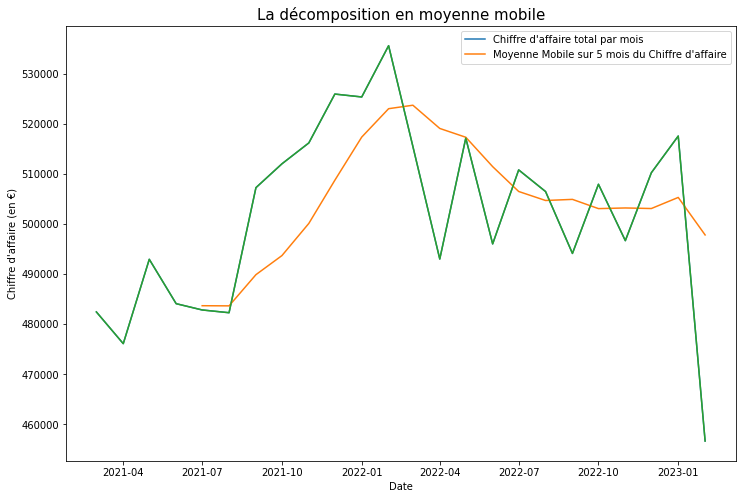

In [507]:
# Puis nous créons le graphique:
plt.figure(figsize = ( 12, 8)) 

# Avec la moyenne normale.
sns.lineplot( x = 'date', 
             y = 'price', 
             data = octobre, 
             label = 'Chiffre d\'affaire total par mois') 
  
# Puis avec la moyenne des chiffres d'affaires sur 5 mois.  
sns.lineplot( x = 'date', 
             y = 'MM_5mois', 
             data = octobre, 
             label = 'Moyenne Mobile sur 5 mois du Chiffre d\'affaire') 
  
# On nomme les axes.
ax = sns.lineplot(x = 'date', y = 'price',data = octobre)
plt.xlabel('Date') 
plt.ylabel('Chiffre d\'affaire (en €)') 

# On donne un titre
plt.title('La décomposition en moyenne mobile', fontsize=15)

##**Les tops/flops (5 produits) ✔**

In [508]:
df.head(5)

,client_id,sex,birth,id_prod,date,session_id,price,categ
0,c_4410,f,1967,0_1316,2021-12-29 09:11:18,s_141762,7.2,0
1,c_4410,f,1967,0_1316,2022-03-29 09:11:18,s_186233,7.2,0
2,c_4410,f,1967,0_1316,2022-05-29 09:11:18,s_215758,7.2,0
3,c_3654,f,1978,0_1316,2021-11-26 03:51:34,s_125143,7.2,0
4,c_3654,f,1978,0_1316,2022-08-26 03:51:34,s_258546,7.2,0


In [509]:
# Je prend le chiffre d'affaire réalisé par produit.
top_flop = df.groupby(['id_prod']).sum()

In [510]:
top_flop

,birth,price,categ
id_prod,,,
0_0,2456430,4657.50,0
0_1,963536,5352.13,0
0_10,43440,394.90,0
0_100,5927,61.80,0
0_1000,854348,2954.88,0
...,...,...,...
2_96,1193365,28650.18,1196
2_97,25962,2092.87,26
2_98,2003,149.74,2


In [511]:
# Je sort la colonne 'id_prod' de l'index.
top_flop = top_flop.reset_index()

In [512]:
top_flop = top_flop[['id_prod','price']]

In [513]:
# Je trie les résultats par ordre décroissant.
top = top_flop.sort_values('price', ascending = False)

In [514]:
# Je trie les résultats par ordre croissant.
flop = top_flop.sort_values('price', ascending = True)

###**Résultat TOP**

In [515]:
top.head(5)

,id_prod,price
3096,2_159,94893.50
3070,2_135,69334.95
3045,2_112,65407.76
3034,2_102,60736.78
3152,2_209,56971.86


###**Résultat Flop**

In [516]:
flop.head(5)

,id_prod,price
3265,T_0,-200.00
595,0_1539,0.99
313,0_1284,1.38
719,0_1653,1.98
2079,0_807,1.99


##**La répartition du chiffre d'affaire par clients ✔**

In [517]:
# Je copie le dataframe avec seulement les colonnes 'client_id' et 'price'.
clients = df[['client_id','price','birth']]

In [518]:
clients

,client_id,price,birth
0,c_4410,7.20,1967
1,c_4410,7.20,1967
2,c_4410,7.20,1967
3,c_3654,7.20,1978
4,c_3654,7.20,1978
...,...,...,...
679306,c_8138,2.14,1984
679307,c_8138,2.14,1984
679308,c_8138,2.14,1984
679309,c_8327,2.14,1972


In [519]:
# Je regroupe les résultats par 'client_id'.
client = clients.groupby('client_id').sum()

In [520]:
# Je reset l'index pour retrouver ma colonne 'client_id'.
client = client.reset_index()

In [521]:
# Puis je trie les résultats pour ordre décroissant.
client = client.sort_values(by=['price'],ascending=False)

In [522]:
# Je selectionne seulement les 5 meilleurs clients.
top5_client = client.head(5)

In [523]:
client

,client_id,price,birth
677,c_1609,324033.35,50466240
4388,c_4958,289760.34,10384805
6337,c_6714,153598.92,18068208
2724,c_3454,113637.93,13330130
2513,c_3263,5276.87,799955
...,...,...,...
7889,c_8114,9.98,3924
7918,c_8140,8.30,3942
8151,c_8351,6.31,1968
8601,ct_1,-94.00,188094


###**Graphique**

Text(0, 0.5, "Chiffre d'affaire (en €)")

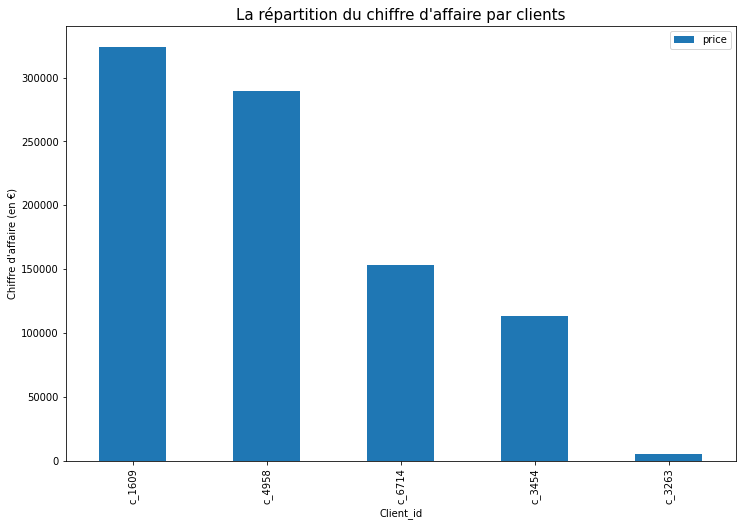

In [524]:
top5_client.plot(x="client_id", y="price", kind='bar',figsize=(12,8))
plt.title('La répartition du chiffre d\'affaire par clients', fontsize=15)

plt.xlabel('Client_id') 
plt.ylabel('Chiffre d\'affaire (en €)') 

**Explication du graphique**

In [525]:
# Je calcul le chiffre d'affaire réalisé par 5 clients.
ca_5clients = top5_client['price'].sum()

In [526]:
ca_5clients

886307.4099999998

In [527]:
# Je calcul le chiffre d'affaire total.
ca_total = df['price'].sum()

In [528]:
# Puis j'éxecute un taux d'évolution pour connaitre la part de ca détenu par 5 clients.
round(ca_5clients / ca_total * 100,2)

7.48

Les 5 meilleurs clients représentent environ 7,5% du chiffre d'affaire total.

##**La courbe de Lorenz ✔**

In [529]:
#On prepare la courbe de Lorenz : l'équilibre des ventes selon les produits

ventes_prod = df['price'].values
n = len(ventes_prod)
lorenz = np.cumsum(np.sort(ventes_prod)) / ventes_prod.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

###**Graphique**

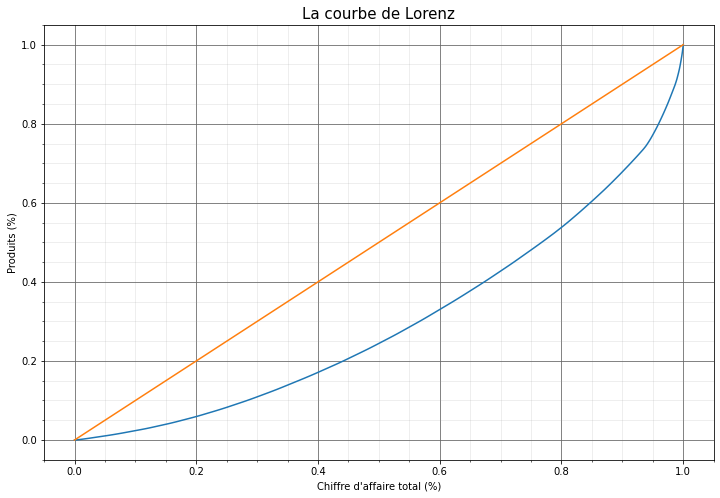

In [530]:
fig, ax = plt.subplots(1, figsize=(12, 8))
xaxis = np.linspace(0-1/n,1+1/n,n+1)
ax.plot(xaxis,lorenz,drawstyle='steps-post')
ax.plot([0,1])
plt.title("La courbe de Lorenz", fontsize=15)
plt.xlabel("Chiffre d'affaire total (%)")
plt.ylabel("Produits (%)")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

#plt.savefig("produits.jpeg", format="jpeg")

In [531]:
# Calcul de l'indice de Gini

AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n
S = 0.5 - AUC # surface entre la première bissectrice et la courbe de Lorenz
gini = 2*S
gini

0.39567174443706554

L'indice de Gini est peu important, la répartition du CA selon les produits est plutôt équilibré.

Cette indice reste quand même plus proche d'une distribution égalitaire.

25% des produits représente 50% du chiffre d'affaire.

#**Demande de Julie : L'analyse des clients**

##**Le lien entre le genre d’un client et les catégories des livres achetés ✔**

In [532]:
# Je crée un dataframe avec les colonnes 'sex', 'categ' et 'price'.
sex_achat_homme = df[['sex','categ','price']]

In [533]:
# Je supprime toutes les lignes, qui ont un sexe féminin.
sex_achat_homme.drop( sex_achat_homme[ sex_achat_homme['sex'] == 'f' ].index, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [534]:
# Je regroupe le chiffre d'affaire par catégories.
sex_achat_homme = sex_achat_homme.groupby('categ').sum()

In [535]:
sex_achat_homme

,price
categ,
0,2229623.90
1,2295305.67
2,1469021.98


In [536]:
# Je sort la colonne 'categ' de l'index.
sex_achat_homme = sex_achat_homme.reset_index()

In [537]:
sex_achat_homme

,categ,price
0,0,2229623.90
1,1,2295305.67
2,2,1469021.98


Répartition du CA par catégories pour les hommes terminé.

In [538]:
# Je crée un dataframe avec les colonnes 'sex', 'categ' et 'price'.
sex_achat_femme = df[['sex','categ','price']]

In [539]:
# Je supprime toutes les lignes, qui ont un sexe masculin.
sex_achat_femme.drop( sex_achat_femme[ sex_achat_femme['sex'] == 'm' ].index, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [540]:
sex_achat_femme.head(2)

,sex,categ,price
0,f,0,7.2
1,f,0,7.2


In [541]:
# Je regroupe le chiffre d'affaire par catégories.
sex_achat_femme = sex_achat_femme.groupby('categ').sum()

In [542]:
sex_achat_femme

,price
categ,
0,2189907.07
1,2358417.02
2,1311253.04


In [543]:
# Je sort la colonne 'categ' de l'index.
sex_achat_femme = sex_achat_femme.reset_index()

In [544]:
sex_achat_femme

,categ,price
0,0,2189907.07
1,1,2358417.02
2,2,1311253.04


Répartition du CA par catégories pour les femmes terminé.

###**Graphique**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Saw kwargs ['ls', 'linestyle'] which are all aliases for 'linestyle'.  Kept value from 'linestyle'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Saw kwargs ['ls', 'linestyle'] which are all aliases for 'linestyle'.  Kept value from 'linestyle'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  if sys.path[0] == '':


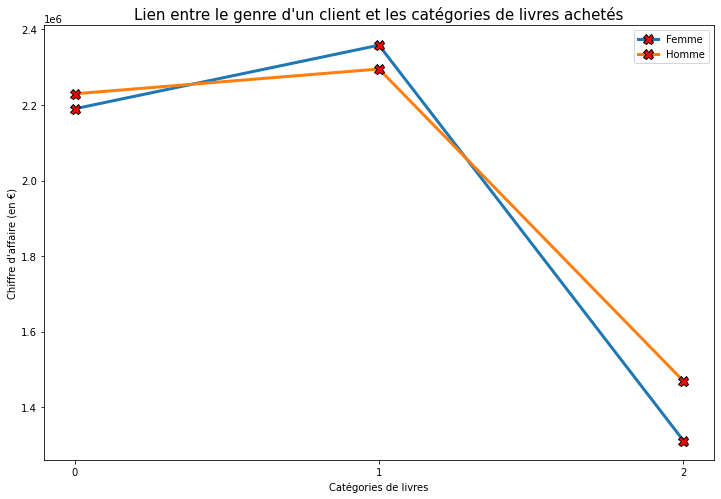

In [545]:
x = sex_achat_femme['categ']
y = sex_achat_homme['price']
z = sex_achat_femme['price']

plt.figure(figsize=(12,8))

plt.xlabel('Catégories de livres') 
plt.ylabel('Chiffre d\'affaire (en €)') 

plt.xticks(range(10), range(3)[::+1])
plt.plot(x, z, linestyle="-", label="Femme", ls="--", lw=3, marker="X", markersize=10, markerfacecolor="red", markeredgecolor="black")
plt.plot(x, y, linestyle="-", label="Homme", ls="--", lw=3, marker="X", markersize=10, markerfacecolor="red", markeredgecolor="black")
plt.title('Lien entre le genre d\'un client et les catégories de livres achetés', fontsize=15)
plt.legend()
plt.show()

Les hommes achetent plus de livres de "catégories 0" et de "catégorie 2" que les femmes.

Les femmes elles, achetent plus de livres de "catégories 1" que les hommes.

##**Le lien entre l’âge des clients et le montant total des achats ✔**

In [546]:
# Je regroupe les prix et j'en fais la somme par âge.
age_achat = df.groupby(['birth']).sum()

In [547]:
# Je supprime la colonne 'birth'.
del age_achat['categ']

In [548]:
# Je sort la colonne 'categ' et 'sex' des index.
age_achat = age_achat.reset_index()

In [549]:
# J'affiche les "années de naissance" qui ont réalisé le plus de CA dans la boutique.
print(age_achat.sort_values(by=['price']))

    birth      price
2    1931    2815.45
0    1929    3221.85
1    1930    4013.87
6    1935    4793.55
3    1932    5043.19
..    ...        ...
59   1988  330760.73
50   1979  334267.72
70   1999  489497.54
75   2004  609013.69
51   1980  613614.58

[76 rows x 2 columns]


###**Graphique**

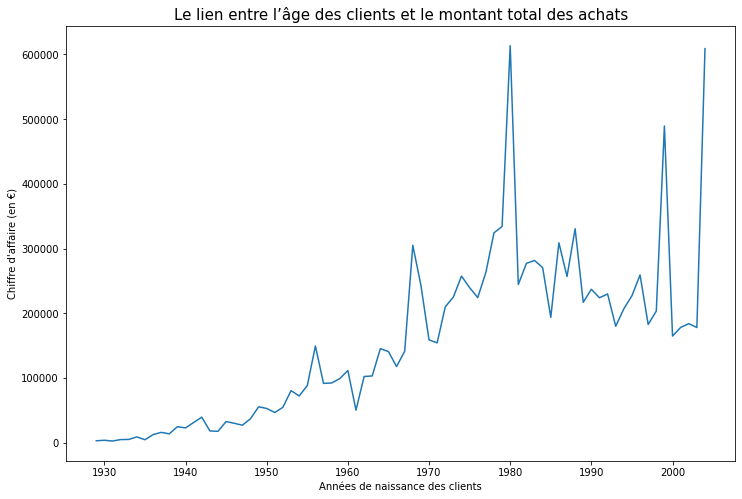

In [550]:
fid, ax = plt.subplots(figsize=(12,8))
x = age_achat['birth']
y = age_achat['price']
ax.plot(x,y)

plt.xlabel('Années de naissance des clients') 
plt.ylabel('Chiffre d\'affaire (en €)') 

plt.title('Le lien entre l’âge des clients et le montant total des achats', fontsize=15)
plt.show()

Les personnes qui ont le plus gros montant des achats sont nées en :
- 1980 (613 614€)
- 2004 (609 013€)
- 1999 (489 497€)
- 1979 (334 267€)
- 1988 (330 760€)

Pourquoi le pic en 1980 ?

Nous avons l'un de nos meilleur client qui est né lors de cette année.

In [551]:
print(clients.loc[2724])
#id_client : c_3454

client_id    c_1296
price          8.99
birth          1980
Name: 2724, dtype: object


##**Le lien entre l'âge des clients et leur fréquence d'achat ✔**

In [552]:
# Groupby sur l'id_client pour avoir le montant total de leurs achats

df_freq = df.groupby(["client_id","birth"]).agg({"session_id": "count"})
df_freq = pd.DataFrame(df_freq)
df_freq = df_freq.rename(columns={"session_id":"nb_achats"})

nb_mois_annee = 12
df_freq.nb_achats = df_freq.nb_achats/nb_mois_annee
df_freq.reset_index(inplace=True)

###**Graphique**

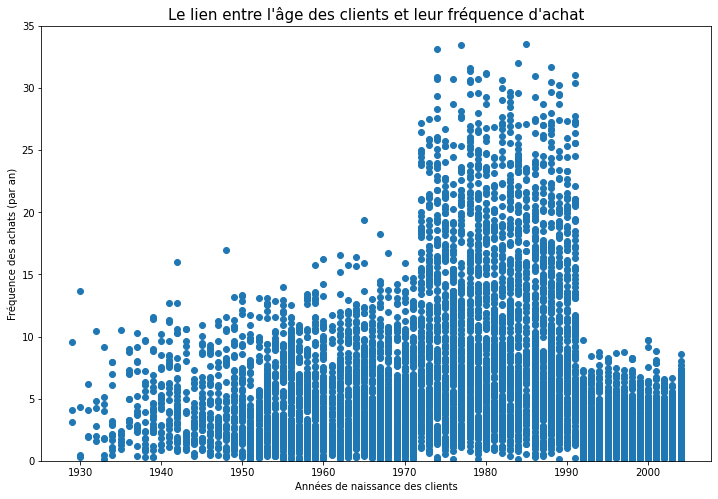

In [553]:
# Diagramme de dispersion
X = df_freq["birth"]
y = df_freq["nb_achats"]


plt.figure(figsize=(12,8))
plt.scatter (X,y)


plt.title("Le lien entre l'âge des clients et leur fréquence d'achat", fontsize=15)
plt.xlabel("Années de naissance des clients")
plt.ylabel("Fréquence des achats (par an)")

plt.ylim(0,35)
plt.xlim(None,None)

plt.show()

Nous pouvons constater que les clients qui ont la plus grosse fréquence d'achat sont nées entre 1972 et 1991.

En soit, ce sont des personnes qui ont entre 31 et 50 ans.

##**Le lien entre l'âge des clients et leur taille de panier moyen ✔**

In [554]:
# Groupby sur l'age pour avoir le nombre d'achats moyen par panier
df_panier_moyen = df.groupby(['client_id',"birth"]).agg({"price": "mean"})

# Je recrée le dataframe
df_panier_moyen = pd.DataFrame(df_panier_moyen)

# Puis je reset l'index
df_panier_moyen.reset_index(inplace=True)

###**Graphique**

Text(0, 0.5, 'Panier moyen (en €)')

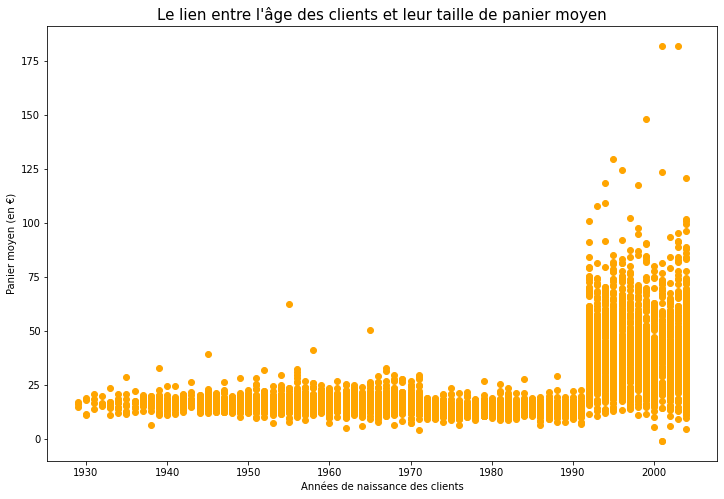

In [555]:
# Diagramme de dispersion
X = df_panier_moyen["birth"]
y = df_panier_moyen["price"]

plt.figure(figsize=(12,8))
plt.scatter (X,y,c="orange")

plt.title("Le lien entre l'âge des clients et leur taille de panier moyen", fontsize=15)
plt.xlabel("Années de naissance des clients")
plt.ylabel("Panier moyen (en €)")

Nous pouvons constater que plus le client est jeune, plus son panier moyen sera important.

Cependant les personnes qui sont nées avant 1992 achètent beaucoup moins.

En conclusion, les personnes qui détiennent le plus gros panier moyen ont moins de 30 ans.

##**Le lien entre l'âge des clients et les catégories de livres achetés ✔**

In [556]:
# Je crée un nouveau DataFrame avec les colonnes 'birth' et 'categ'.
corr_age_categ = df[['birth', 'categ']]

In [557]:
# Je regroupe les résultats sur les années de naissance et je fais une moyenne pour les catégories.
corr_categ = corr_age_categ.groupby(['birth']).mean()

In [558]:
# Suppression des doublons dans les années de naissance.
corr_age = corr_age_categ.drop_duplicates(subset=['birth'])

In [559]:
# Suppression de la colonne 'categ'.
corr_age = corr_age['birth']

In [560]:
# Je recrée mon dataframe.
corr_age = pd.DataFrame(corr_age)

###**Graphique**

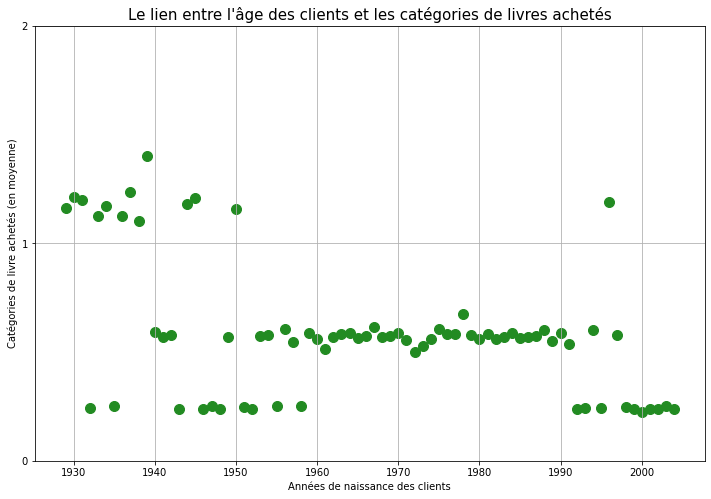

In [561]:
plt.rcParams["figure.figsize"] = (12, 8)

t = corr_age
s = corr_categ

fig, ax = plt.subplots()
ax.scatter(t, s, s=100, c="forestgreen")

ax.set(xlabel='Années de naissance des clients', ylabel='Catégories de livre achetés (en moyenne)')
ax.grid()

ax.set_ylim(0,2)
ticks = [t for t in range(0,3,1)]
ax.set_yticks(ticks)
ax.set_yticklabels(ticks)

plt.title("Le lien entre l\'âge des clients et les catégories de livres achetés", fontsize=15)

plt.show()